In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [4]:
data = pd.read_csv("D:\house-prices-advanced-regression-techniques\sample_submission.csv")  # Load dataset
print(data.head())  # Preview the first few rows


     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977


<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\gayat\AppData\Local\Temp\ipykernel_1564\1356777158.py:1: SyntaxWarning: invalid escape sequence '\h'
  data = pd.read_csv("D:\house-prices-advanced-regression-techniques\sample_submission.csv")  # Load dataset


In [5]:
print(data.columns)

Index(['Id', 'SalePrice'], dtype='object')


In [6]:
print(data.head())


     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977


In [7]:
data = pd.read_csv("train.csv")  # Update the path if needed
print(data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [8]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [36]:
import os
data_path = "train.csv"
if os.path.exists(data_path):
    data = pd.read_csv(data_path)
    print(data.columns)  # Verify all columns
else:
    print(f"File not found: {data_path}")


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [37]:
data = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']]


In [38]:
data['TotalBathrooms'] = data['FullBath'] + 0.5 * data['HalfBath']  # Combine bathrooms
X = data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]  # Features
y = data['SalePrice']  # Target


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
model = LinearRegression()  # Initialize the model
model.fit(X_train, y_train)  # Train the model


LinearRegression()

In [41]:
y_pred = model.predict(X_test)  # Predict prices for test data

mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R² Score

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2848523443.4191008
R² Score: 0.6286307301050609


In [42]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [   100.63689525 -26645.53251638  27083.20771296]
Intercept: 56862.57751607981


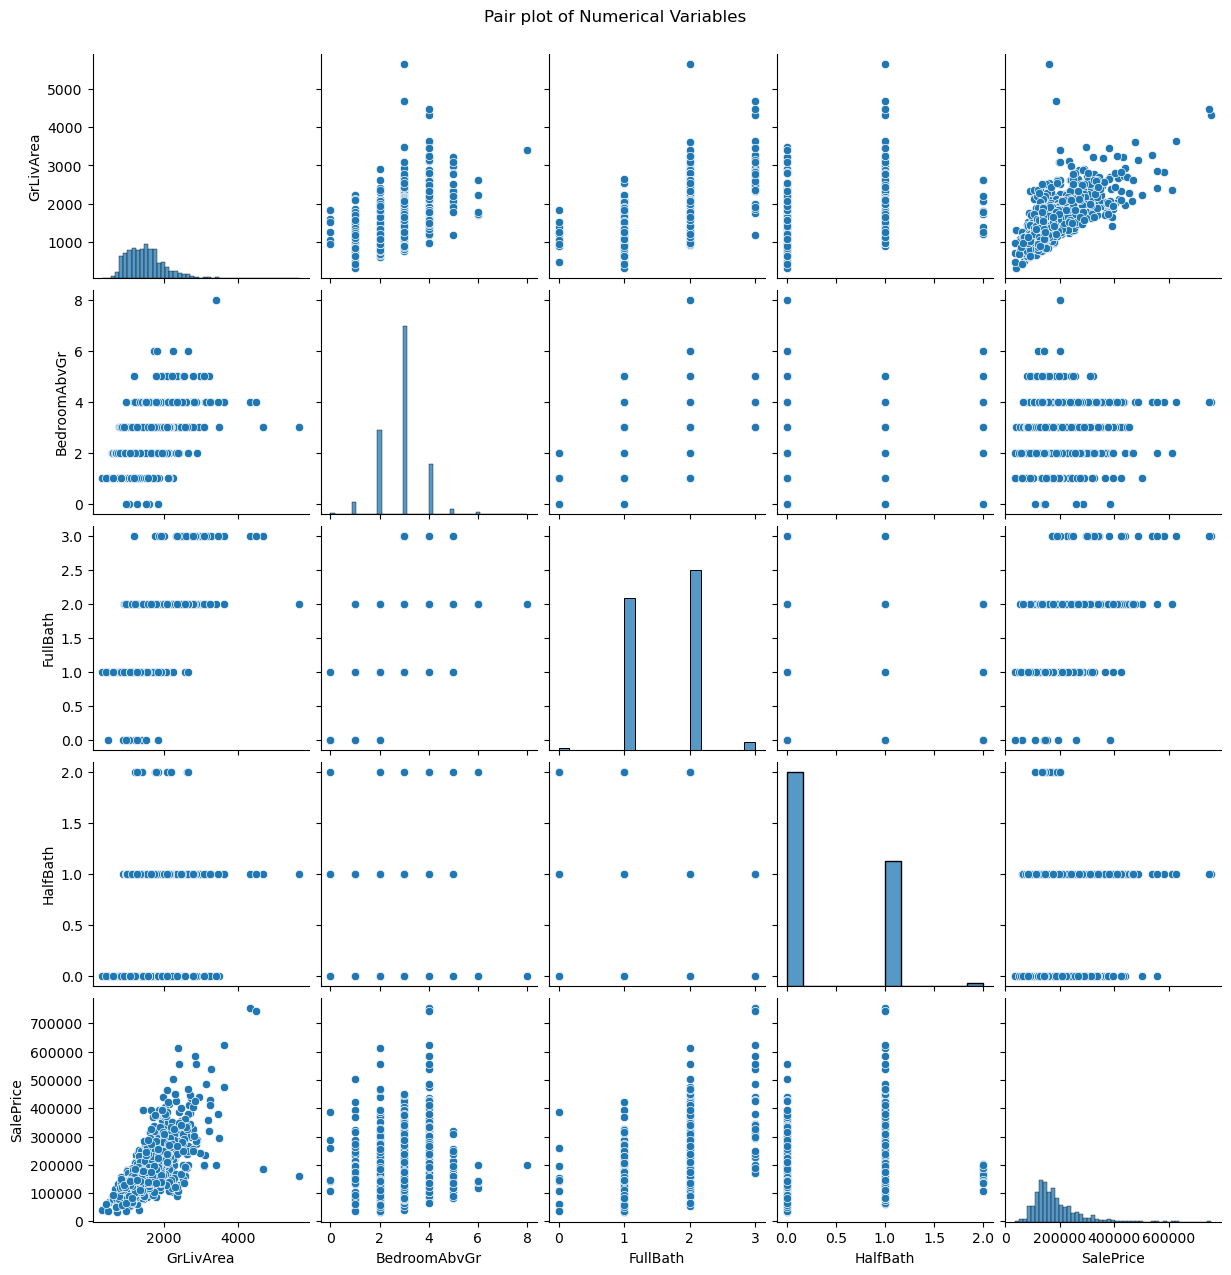

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data for visualization (replace with your actual dataset)
# data = pd.read_csv("your_dataset.csv")

# Creating the pairplot
sns.pairplot(data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']])

# Adding a title to the plot
plt.suptitle('Pair plot of Numerical Variables', y=1.02)

# Displaying the plot
plt.show()


In [16]:
# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
data = pd.read_csv(r"D:\house-prices-advanced-regression-techniques\train.csv")  # Update the path as needed

# Select Relevant Features
data['TotalBathrooms'] = data['FullBath'] + 0.5 * data['HalfBath']  # Combine FullBath and HalfBath
X = data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]  # Features
y = data['SalePrice']  # Target variable

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on Test Set
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output Results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Model Coefficients: [   100.63689525 -26645.53251638  27083.20771296]
Model Intercept: 56862.57751607981
Mean Squared Error: 2848523443.4191008
R² Score: 0.6286307301050609


Model Coefficients: [   100.63689525 -26645.53251638  27083.20771296]
Model Intercept: 56862.57751607981
Mean Squared Error (MSE): 2848523443.4191008
Mean Absolute Error (MAE): 36569.644427873995
R² Score: 0.6286307301050609


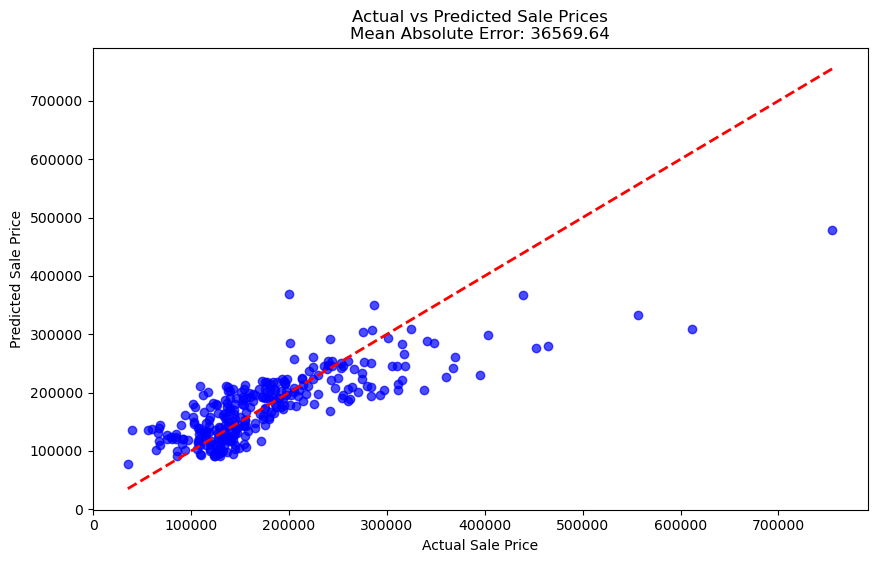

In [17]:
# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load Dataset
data = pd.read_csv(r"D:\house-prices-advanced-regression-techniques\train.csv")  # Update the path as needed

# Select Relevant Features
data['TotalBathrooms'] = data['FullBath'] + 0.5 * data['HalfBath']  # Combine FullBath and HalfBath
X = data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]  # Features
y = data['SalePrice']  # Target variable

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on Test Set
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output Results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Plot Actual vs Predicted Sale Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')  # Scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Reference line
plt.title(f'Actual vs Predicted Sale Prices\nMean Absolute Error: {mae:.2f}')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()


In [18]:
# Function to Predict for Custom Inputs
def predict_house_price(square_footage, bedrooms, full_bathrooms, half_bathrooms):
    total_bathrooms = full_bathrooms + 0.5 * half_bathrooms
    input_data = pd.DataFrame({
        'GrLivArea': [square_footage],
        'BedroomAbvGr': [bedrooms],
        'TotalBathrooms': [total_bathrooms]
    })
    predicted_price = model.predict(input_data)
    return predicted_price[0]

# Example: Predicting for Custom Inputs
square_footage = 2000  # Enter square footage
bedrooms = 3           # Enter number of bedrooms
full_bathrooms = 2     # Enter number of full bathrooms
half_bathrooms = 1     # Enter number of half bathrooms

predicted_price = predict_house_price(square_footage, bedrooms, full_bathrooms, half_bathrooms)
print(f"Predicted Sale Price for the house: ${predicted_price:.2f}")

Predicted Sale Price for the house: $245907.79
